## Q1

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_16276\3666354897.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix,'single')


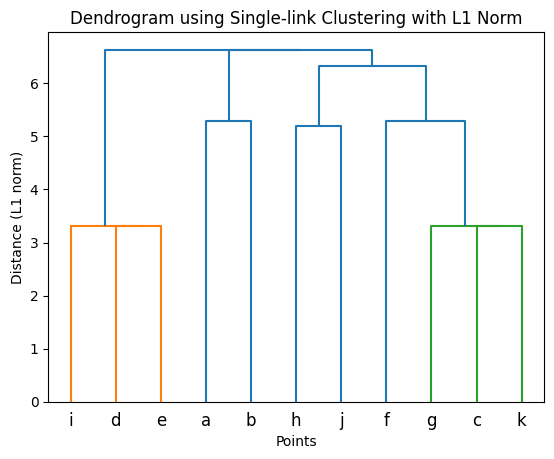

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.cluster import AgglomerativeClustering

points = {
    'a': (5, 8),
    'b': (6, 7),
    'c': (6, 5),
    'd': (2, 4),
    'e': (3, 4),
    'f': (5, 4),
    'g': (7, 4),
    'h': (9, 4),
    'i': (3, 3),
    'j': (8, 2),
    'k': (7, 5)
}
labels = list(points.keys())
X = np.array(list(points.values()))


# Q1.1 plot the dendrogram
distance_matrix = np.abs(X[:, np.newaxis] - X).sum(axis=2)
linked = linkage(distance_matrix,'single')

plt.figure()
dendrogram(linked, labels=labels)
plt.title('Dendrogram using Single-link Clustering with L1 Norm')
plt.xlabel('Points')
plt.ylabel('Distance (L1 norm)')
plt.show()

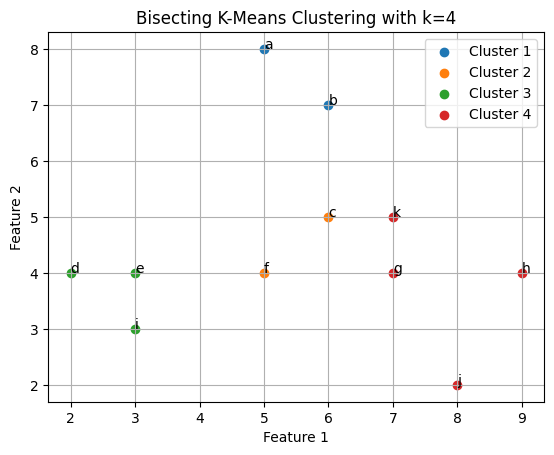

In [8]:
# Q3:
# https://scikit-learn.org/dev/modules/generated/sklearn.cluster.BisectingKMeans.html
from sklearn.cluster import BisectingKMeans
import numpy as np
X = np.array([[5, 8], [6, 7], [6,5], [2,4], [3,4], [5,4],[7,4],[9,4],[3,3],[8,2],[7,5]])
bisect_means = BisectingKMeans(n_clusters=4, random_state=0).fit(X)
# Get the cluster labels assigned by the Bisecting KMeans algorithm
cluster_labels = bisect_means.labels_

plt.figure()
unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    cluster_data = X[cluster_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label+1}')

point_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
for i, point_label in enumerate(point_labels):
    coord = X[i]
    plt.text(coord[0], coord[1], point_label)

plt.title('Bisecting K-Means Clustering with k=4')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Q2


In [ ]:
## Q2.1 
'''
Calculate max Chebyshev distance between two points  x  and  y. 
Create the distance matrix

Given the distance matrix with minPts = 5 and max distance fo 2,
there are no core points, there are no borders

Thus, all the point {a,b,c,d,e,f,g,h,i,j,k} are noise
'''

## Q2.2
'''
	a	b	c	d	e	f	g	h	i	j	k
a	0	1	1	3	2	0	2	4	2	3	2
b	1	0	0	3	3	1	1	3	3	2	1
c	1	0	0	1	1	1	1	1	2	2	0
d	3	3	1	0	0	0	0	0	1	2	1
e	2	3	1	0	0	0	0	0	0	2	1
f	0	1	1	0	0	0	0	0	1	2	1
g	2	1	1	0	0	0	0	0	1	1	0
h	4	3	1	0	0	0	0	0	1	1	1
i	2	3	2	1	0	1	1	1	0	1	2
j	3	2	2	2	2	2	1	1	1	0	1
k	2	1	0	1	1	1	0	1	2	1	0

e = 1, minPts = 6
Core: {c, d, e, f, g, h, i, k}
Border: {a,b,j}
Noise: None
'''

## Q3


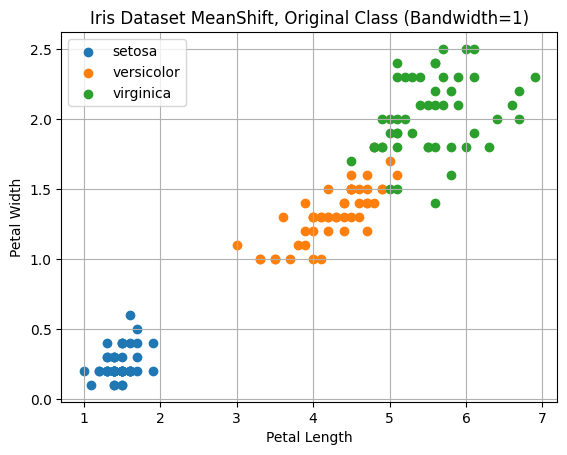

0.7653904101258123


In [14]:
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np


iris = load_iris()
X_class = iris.data[:, 2:4]
y = iris.target  


mean_shift = MeanShift(bandwidth=1).fit(X_class)

# Q3.1a
# plt.figure()
# for label in np.unique(y):
#     plt.scatter(X_class[y == label, 0], X_class[y == label, 1], label=f'{iris.target_names[label]}')

# plt.title("Iris Dataset MeanShift, Original Class (Bandwidth=1)")
# plt.xlabel("Petal Length")
# plt.ylabel("Petal Width")
# plt.legend()
# plt.grid(True)
# plt.show()



#Q3.1c
from sklearn.metrics import silhouette_score
silhouette_index = silhouette_score(X_class, mean_shift.fit_predict(X_class))
print(silhouette_index)

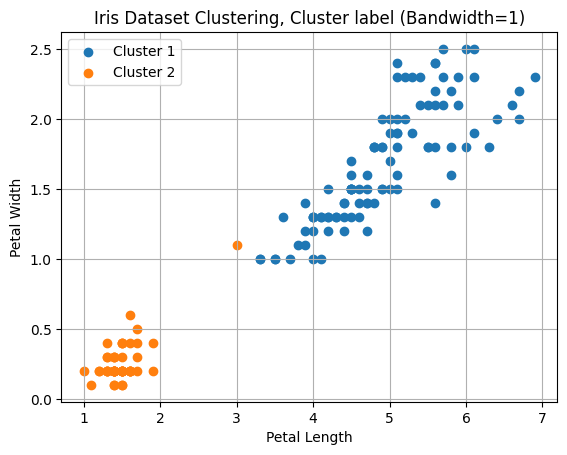

In [10]:
# Q3.1b
X_cluster = iris.data[:, 2:4]   
 

cluster_labels = mean_shift.labels_
plt.figure()
for label in np.unique(cluster_labels):
    plt.scatter(X_cluster[cluster_labels == label, 0], X_cluster[cluster_labels == label, 1], label=f'Cluster {label+1}')

plt.title("Iris Dataset Clustering, Cluster label (Bandwidth=1)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid(True)
plt.show()


In [74]:
#Q3.1c
from sklearn.metrics import silhouette_score

silhouette_index = silhouette_score(X_cluster, cluster_labels)
print(silhouette_index)


0.7653904101258123


In [75]:
#Q3.2a
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(X, quantile=0.2)

np.float64(0.511322905168332)

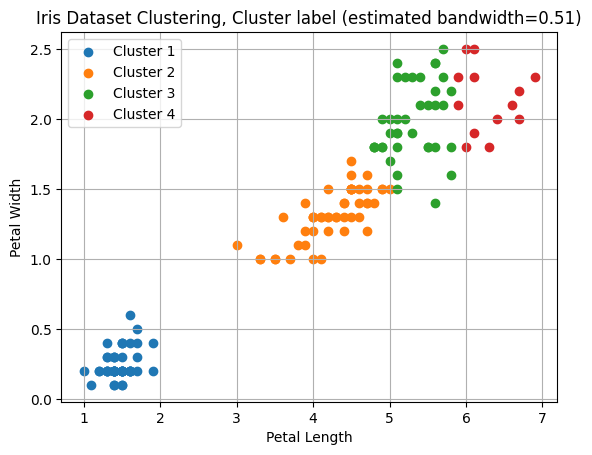

In [77]:
#Q3.2b
X_cluster_2 = iris.data[:, 2:4]   
mean_shift2 = MeanShift(bandwidth=0.51).fit(X_class)
cluster_labels_2 = mean_shift2.labels_

plt.figure()
for label in np.unique(cluster_labels_2):
    plt.scatter(X_cluster_2[cluster_labels_2 == label, 0], X_cluster_2[cluster_labels_2 == label, 1], label=f'Cluster {label+1}')

plt.title("Iris Dataset Clustering, Cluster label (estimated bandwidth=0.51)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid(True)
plt.show()


In [80]:
# Q3.2c

# Bandwidth = 1 
silhouette_index = silhouette_score(X_cluster, cluster_labels)
print(silhouette_index)

# Bandwidth = 0.51 (estimated)
silhouette_index = silhouette_score(X_cluster_2, cluster_labels_2)
print(silhouette_index)


'''
Due to Bandwidth = 1 has a higher silhouette index than Bandwidth = 0.51 (estimated),
we can said that bandwidth = 1 is the better clustering for the dataset
'''

0.7653904101258123
0.6090544715871369


'\nDue to Bandwidth = 1 has a higher silhouette index than Bandwidth = 0.51 (estimated),\nwe can said that bandwidth = 1 is the better clustering for the dataset\n'

## Q4


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('Assignment_3_Dataset.txt', sep='\t')

# feature , label
x,y = data.iloc[:,1:], data.iloc[:, 0]

# split traring and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Gaussian Naive Bayes
gnb = GaussianNB()

# Train and evaluate Gaussian Naive Bayes
gnb.fit(x_train, y_train)
y_train_pred_gnb = gnb.predict(x_train)
y_test_pred_gnb = gnb.predict(x_test)


accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
precision_gnb = precision_score(y_test, y_test_pred_gnb)
recall_gnb = recall_score(y_test, y_test_pred_gnb)
f1_gnb = f1_score(y_test, y_test_pred_gnb)

####################### GNB confusion matrix #######################
confusion_train_gnb = confusion_matrix(y_train, y_train_pred_gnb)
confusion_test_gnb = confusion_matrix(y_test, y_test_pred_gnb)

# Q4.1a Training set confusion matrix
print("GNB Training Confusion Matrix:\n", confusion_train_gnb)
# Q4.1b Testing set confusion matrix
print("GNB Testing Confusion Matrix:\n", confusion_test_gnb)
# Q4.1c accuracy, precision, recall, f1 score
print("Accuracy:", accuracy_gnb, "\n",
      "Precision:", precision_gnb, "\n",
      "Recall:", recall_gnb, "\n",
      "F1 Score:", f1_gnb,
      )


GNB Training Confusion Matrix:
 [[39 32]
 [25 44]]
GNB Testing Confusion Matrix:
 [[18 11]
 [10 21]]
Accuracy: 0.65 
 Precision: 0.65625 
 Recall: 0.6774193548387096 
 F1 Score: 0.6666666666666666


In [90]:

knn = KNeighborsClassifier()

# Train and evaluate knn
knn.fit(x_train,y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)


accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)

####################### KNN #######################
confusion_train_knn = confusion_matrix(y_train, y_train_pred_knn)
confusion_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Q4.1a Training set confusion matrix
print("knn Training Confusion Matrix:\n", confusion_train_knn)
# Q4.1b Testing set confusion matrix
print("knn Testing Confusion Matrix:\n", confusion_test_knn)
# Q4.1c accuracy, precision, recall, f1 score
print("Accuracy:", accuracy_knn, "\n",
      "Precision:", precision_knn, "\n",
      "Recall:", recall_knn, "\n",
      "F1 Score:", f1_knn,
      )

# Q4.2
'''
1. gnb will be faster becuase it is a liearn classifier, while k-nn is not. If given a much 
larger data set, gnb will do better in speed

2. gnb is a simple model with no significant hyperparameter, while k-nn's complexity are influenced by choice of k

3. gnb works well only with continuous and normally distributed data, while k-nn can handle catergorial data and other complexed data

In conclusion, gnb works better with small, normally distributed, and independent dataset. knn is better with large (but not too large), more
complexed data
'''

knn Training Confusion Matrix:
 [[70  1]
 [ 4 65]]
knn Testing Confusion Matrix:
 [[28  1]
 [ 4 27]]
Accuracy: 0.9166666666666666 
 Precision: 0.9642857142857143 
 Recall: 0.8709677419354839 
 F1 Score: 0.9152542372881356
